In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('golf.csv')
df.head(2)

,Day,Outlook,Temperature,Humidity,Windy,Play
0,1,Sunny,Hot,High,False,No
1,2,Sunny,Hot,High,True,No


In [3]:
df.drop(['Day'],axis=1,inplace=True)

In [4]:
df.head(2)

,Outlook,Temperature,Humidity,Windy,Play
0,Sunny,Hot,High,False,No
1,Sunny,Hot,High,True,No


In [5]:
y=df['Play']

In [6]:
df.drop(['Play'],axis=1,inplace=True)

In [7]:
y.head(2)

0    No
1    No
Name: Play, dtype: object

In [8]:
df.head()

,Outlook,Temperature,Humidity,Windy
0,Sunny,Hot,High,False
1,Sunny,Hot,High,True
2,Overcast,Hot,High,False
3,Rainy,Mild,High,False
4,Rainy,Cool,Normal,False


In [10]:
x=df

In [11]:
x

,Outlook,Temperature,Humidity,Windy
0,Sunny,Hot,High,False
1,Sunny,Hot,High,True
2,Overcast,Hot,High,False
3,Rainy,Mild,High,False
4,Rainy,Cool,Normal,False
5,Rainy,Cool,Normal,True
6,Overcast,Cool,Normal,True
7,Sunny,Mild,High,False
8,Sunny,Cool,Normal,False
9,Rainy,Mild,Normal,False


In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
for col in x:
    le = LabelEncoder()
    # fit transform generates the classes as well as transforms the data
    x[col] = le.fit_transform(x[col])
    print(col, " : ", le.classes_)
x.head()

Outlook  :  ['Overcast' 'Rainy' 'Sunny']
Temperature  :  ['Cool' 'Hot' 'Mild']
Humidity  :  ['High' 'Normal']
Windy  :  [False  True]


,Outlook,Temperature,Humidity,Windy
0,2,1,0,0
1,2,1,0,1
2,0,1,0,0
3,1,2,0,0
4,1,0,1,0


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [18]:
log=LogisticRegression()
log.fit(x_train,y_train)
log.score(x_test,y_test)

C:\Users\jayes\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8

In [20]:
y_pred=log.predict(x_test)
y_pred

array(['Yes', 'No', 'Yes', 'Yes', 'No'], dtype=object)

In [23]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
dt.score(x_test, y_test)

0.4

In [24]:
# to display the tree
from sklearn import tree
tree.plot_tree(dt.fit(x_train, y_train))

[Text(248.0, 308.0, 'X[3] <= 0.5\ngini = 0.494\nsamples = 9\nvalue = [4, 5]'),
 Text(124.0, 184.79999999999998, 'X[2] <= 0.5\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(62.0, 61.599999999999966, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(186.0, 61.599999999999966, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(372.0, 184.79999999999998, 'X[0] <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(310.0, 61.599999999999966, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(434.0, 61.599999999999966, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]')]

In [25]:
#default - gini

# calculate decision tree based on information gain
dt = DecisionTreeClassifier(criterion="entropy")
dt.fit(x_train, y_train)
dt.score(x_test, y_test)

0.4

[Text(167.4, 181.2, 'X[3] <= 0.5\nentropy = 0.991\nsamples = 9\nvalue = [4, 5]'),
 Text(83.7, 108.72, 'X[2] <= 0.5\nentropy = 0.722\nsamples = 5\nvalue = [1, 4]'),
 Text(41.85, 36.23999999999998, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(125.55000000000001, 36.23999999999998, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(251.10000000000002, 108.72, 'X[0] <= 0.5\nentropy = 0.811\nsamples = 4\nvalue = [3, 1]'),
 Text(209.25, 36.23999999999998, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(292.95, 36.23999999999998, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]')]

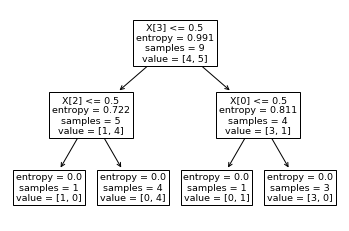

In [26]:
# to display the tree
from sklearn import tree
tree.plot_tree(dt.fit(x_train, y_train))

In [27]:
# for level restriction
dt = DecisionTreeClassifier(criterion="entropy", max_depth=2)
dt.fit(x_train, y_train)
dt.score(x_test, y_test)

0.4

[Text(167.4, 181.2, 'X[3] <= 0.5\nentropy = 0.991\nsamples = 9\nvalue = [4, 5]'),
 Text(83.7, 108.72, 'X[2] <= 0.5\nentropy = 0.722\nsamples = 5\nvalue = [1, 4]'),
 Text(41.85, 36.23999999999998, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(125.55000000000001, 36.23999999999998, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(251.10000000000002, 108.72, 'X[0] <= 0.5\nentropy = 0.811\nsamples = 4\nvalue = [3, 1]'),
 Text(209.25, 36.23999999999998, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(292.95, 36.23999999999998, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]')]

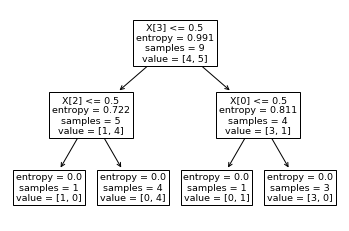

In [28]:
# to display the tree
from sklearn import tree
tree.plot_tree(dt.fit(x_train, y_train))

In [29]:
dt.score(x_test, y_test)

0.4